#SEMMA Overview:
##Sample: Select a representative dataset for analysis.
##Explore: Perform exploratory data analysis (EDA) to uncover patterns and relationships in the data.
##Modify: Clean, preprocess, and transform the data as necessary.
##Model: Apply modeling techniques to find patterns and relationships in the data.
##Assess: Evaluate the performance of the model using appropriate metrics.

#Step 1 - Sample
##Objective:
In the Sample phase of SEMMA, we focus on selecting a representative dataset for analysis. You've provided a wine dataset, which contains various chemical properties of wine samples, including the following features:

fixed_acidity, volatile_acidity, citric_acid: Chemical components of the wine.
residual_sugar, chlorides, free_sulfur_dioxide: Other chemical measurements.
density, pH, sulphates, alcohol: Further characteristics of each sample.
quality: The quality rating of the wine, which we assume will be our target variable for prediction.
style: The type of wine, either "red" or "white."

In [2]:
!gdown 1seOAJxGY0MxdR90-emKqGFY0ejUcp8tn
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dell4010/wine-dataset

Downloading...
From: https://drive.google.com/uc?id=1seOAJxGY0MxdR90-emKqGFY0ejUcp8tn
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 272kB/s]
Dataset URL: https://www.kaggle.com/datasets/dell4010/wine-dataset
License(s): CC0-1.0
wine-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip /content/wine-dataset.zip

Archive:  /content/wine-dataset.zip
replace wine_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './wine_dataset.csv'
wine_data = pd.read_csv(file_path)

# Display the first few rows
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#Step 2: Explore
In the Explore phase, we will:

Perform exploratory data analysis (EDA) to examine distributions, correlations, and patterns.
Check for missing values and outliers.
Identify any potential relationships between features that can be important for modeling.

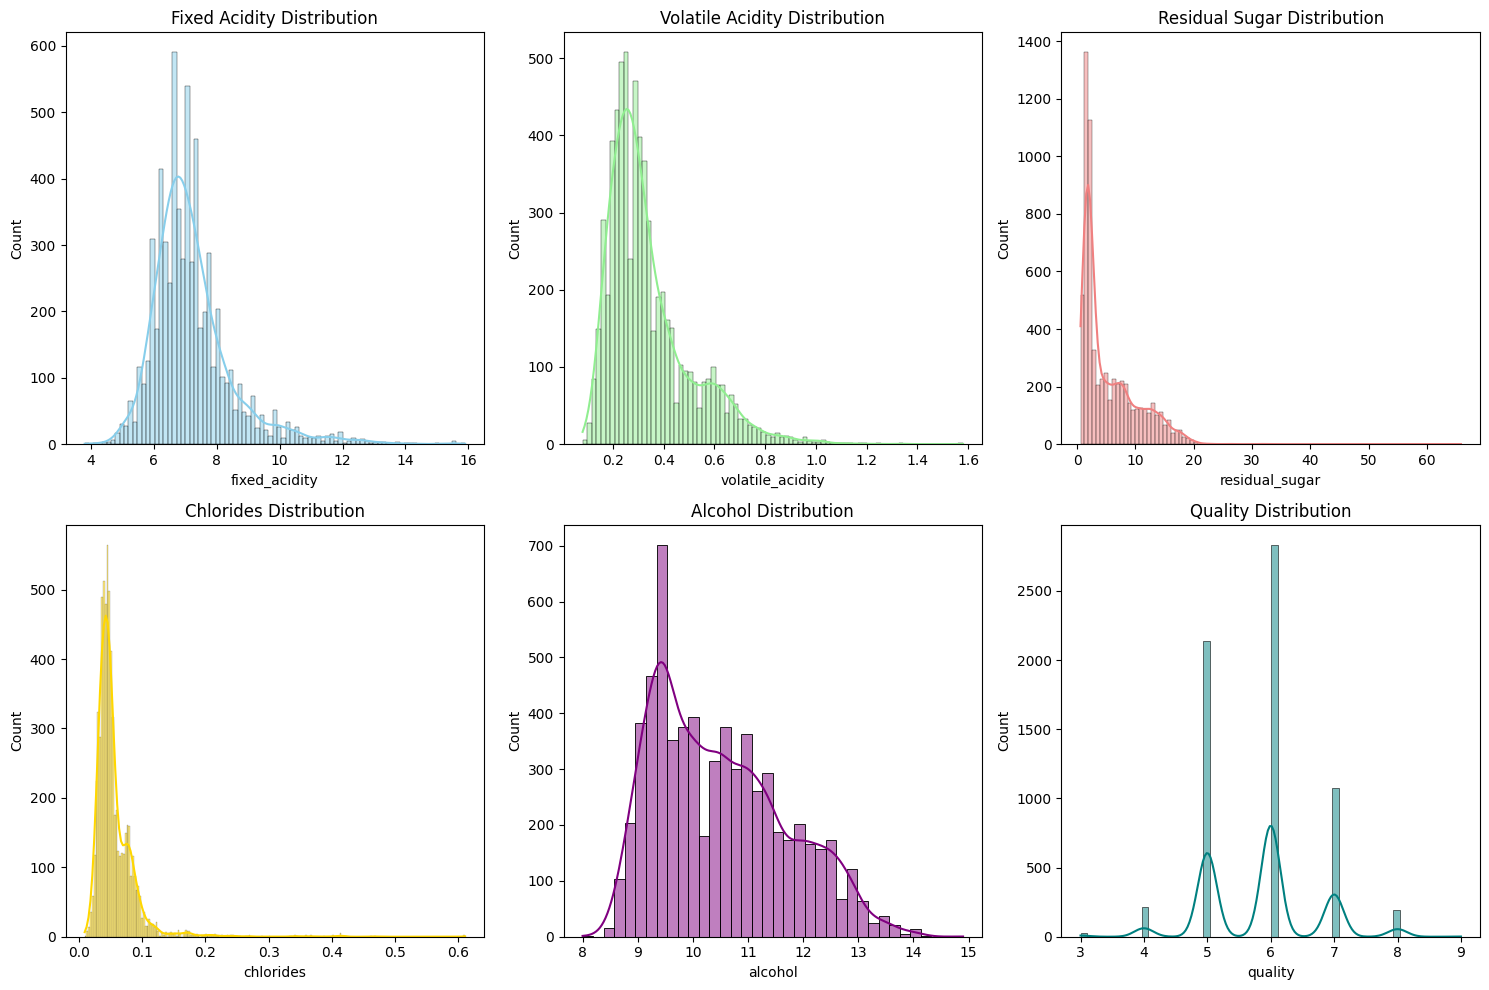

In [11]:
# Select only numeric columns for correlation matrix
numeric_cols = wine_data.select_dtypes(include=['float64', 'int64'])

# Visualizing the distributions of key numerical features
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Histograms for selected columns
sns.histplot(wine_data['fixed_acidity'], ax=ax[0, 0], color='skyblue', kde=True)
ax[0, 0].set_title('Fixed Acidity Distribution')

sns.histplot(wine_data['volatile_acidity'], ax=ax[0, 1], color='lightgreen', kde=True)
ax[0, 1].set_title('Volatile Acidity Distribution')

sns.histplot(wine_data['residual_sugar'], ax=ax[0, 2], color='lightcoral', kde=True)
ax[0, 2].set_title('Residual Sugar Distribution')

sns.histplot(wine_data['chlorides'], ax=ax[1, 0], color='gold', kde=True)
ax[1, 0].set_title('Chlorides Distribution')

sns.histplot(wine_data['alcohol'], ax=ax[1, 1], color='purple', kde=True)
ax[1, 1].set_title('Alcohol Distribution')

sns.histplot(wine_data['quality'], ax=ax[1, 2], color='teal', kde=True)
ax[1, 2].set_title('Quality Distribution')


plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

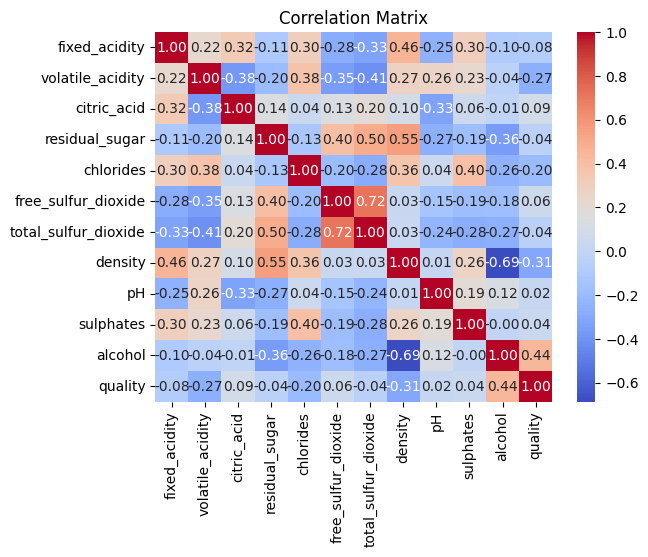

In [14]:
# Correlation matrix for only numeric columns
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

##Distribution Observations:
Fixed Acidity: Shows a right-skewed distribution with most values clustering between 6 and 10.

Volatile Acidity: The distribution is left-skewed, meaning most samples have lower volatile acidity levels.

Residual Sugar: Exhibits a strong right skew, with most wines having low sugar levels but a few outliers with higher sugar content.

Alcohol: Shows a relatively normal distribution, with most wines having an alcohol content between 9 and 12%.

Quality: The wine quality is concentrated between 5 and 6, which could indicate limited variation in the quality labels.

##Correlation Matrix:
Alcohol is positively correlated with quality, indicating that higher alcohol content may be associated with better wine quality.
Volatile Acidity is negatively correlated with quality, suggesting that higher levels of volatile acidity reduce wine quality.
Other features like pH, sulphates, and residual sugar show weak correlations with quality, though they might still be relevant for modeling.


#Step 3: Modify
In this step, we will:

Handle missing values (though none are present at first glance).

Encode categorical variables (e.g., "style").

Perform any necessary feature scaling (for features like acidity, chlorides, etc.).

I will now proceed with data cleaning, feature encoding, and scaling for the modeling phase. ​​



In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the 'style' column (red/white wines)
le_style = LabelEncoder()
wine_data['style_encoded'] = le_style.fit_transform(wine_data['style'])

# Scale the numerical features to bring them on a similar scale
scaler = StandardScaler()

# List of numerical columns to scale
scaled_features = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
                   'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                   'total_sulfur_dioxide', 'density', 'pH',
                   'sulphates', 'alcohol']

# Apply scaling to the numeric columns
wine_data[scaled_features] = scaler.fit_transform(wine_data[scaled_features])

# Prepare the features and target for modeling
X = wine_data[scaled_features + ['style_encoded']]
y = wine_data['quality']

# Display the first few rows of the modified data
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style,style_encoded
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5,red,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,5,red,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,5,red,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,6,red,0
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5,red,0


The data has been successfully prepared for modeling:

Categorical Encoding: The style column (wine type) has been encoded.
Feature Scaling: All numeric features have been standardized using StandardScaler to ensure the model treats all features on a similar scale.
Prepared Features and Target: The target variable for prediction remains quality, while the scaled features and encoded style will be used as inputs for the mode

#Step 4 Model

In the Model phase, we will:

Build models to predict wine quality, similar to the previous methodology.
Start with a simple Linear Regression and Random Forest model to compare performance.
Evaluate the models using suitable metrics, such as Mean Absolute Error (MAE) and R-squared (R²).


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# 2. Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output the evaluation metrics
print(f"Linear Regression MAE: {mae_lr}, R²: {r2_lr}")
print(f"Random Forest MAE: {mae_rf}, R²: {r2_rf}")

Linear Regression MAE: 0.5644129055680379, R²: 0.26715748512455695
Random Forest MAE: 0.4369846153846153, R²: 0.49815894640362013


#Step 5 Assess
In the Assess phase, we will:

Compare the models based on performance metrics.
Consider any fine-tuning or improvements to the models.
Draw conclusions and decide which model is better suited for deployment.

In [18]:
# Decide the best performing model
if mae_rf < mae_lr:
    print("Random Forest performs better based on MAE.")
else:
    print("Linear Regression performs better based on MAE.")

Random Forest performs better based on MAE.


In [19]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, 'random_forest_wine_quality_model.pkl')

# Confirm the model has been saved
print("Random Forest model saved successfully.")

Random Forest model saved successfully.


In [20]:
# Load the saved Random Forest model
loaded_model = joblib.load('random_forest_wine_quality_model.pkl')

# Example prediction using the loaded model (use the first sample from the test set)
sample_data = X_test.iloc[0].values.reshape(1, -1)
predicted_quality = loaded_model.predict(sample_data)
print(f"Predicted Wine Quality for Sample: {predicted_quality}")


Predicted Wine Quality for Sample: [6.38]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
